# <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW2. Growth of functions, recursion, binary search

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [2]:
def measure_runtime(function):
    def measure(*args, **kwargs):
        start = perf_counter()
        function(*args, **kwargs)
        end = perf_counter()
        return end - start
    return measure

In [3]:
def ex2():
    def log_star(n):
        if n > 1:
            return 1 + log_star(math.log2(n))
        else:
            return 0

    functions = [
    ("1", lambda x : 1),
    ("lg^*(n)", lambda x : log_star(x)),
    ("2^{lg^*(n)}", lambda x : 2**log_star(x)),
    #0("ln(n)", lambda x : np.log(x)),
    ("n", lambda x : x),
    ("n * log(n)", lambda x : x * np.log10(x)),
    #("log(n!)", lambda x : x * np.log2(float(math.factorial(math.floor(x))))),
    ("n^2", lambda x : x**2),
    #("n^3", lambda x : x**3),
    ("2^n", lambda x : 2**x),
    ("e^{n}", lambda x : math.e**x),
    ("2^{2^n}", lambda x : 4**x),
    ("2^{2^{(n+1)}}", lambda x : 4**(x+1)),
    #("n!", lambda x : math.factorial(math.floor(x))),
    #"(n + 1)!$", lambda x : math.factorial(math.floor(x+1)),
    ]
    plt.subplots(figsize=(10, 10))
    n = np.linspace(0.1, 30, 1000)
    plt.ylim(0, 50)
    for label, function in functions:
        plt.plot(n, [function(x) for x in n], label=f"${label}$", linewidth=4)
    plt.grid()
    plt.legend(prop={'size': 16}, loc='upper center')
    plt.title('Time complexity Chart', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('y (operations)', fontsize=16)
    plt.show()

In [4]:
def ex3(A, B):
    plt.subplots(figsize=(10, 10))
    n = np.linspace(1, 20, 11)
    plt.plot(n, [A(x) for x in n], label="$A(N) = A(N/2) + 1$", linewidth=4)
    plt.plot(n, [B(x) for x in n], label=f"$B(N) = 2B(N/2) + N$", linewidth=4)
    plt.plot(n, [x * math.log2(x) for x in n], label=f"$n*log_2(n)$", linewidth=4)
    plt.plot(n, [math.log2(x) for x in n], label=f"$log_2(n)$", linewidth=4)
    plt.grid()
    plt.legend(prop={'size': 16})
    plt.title('Recurrent Function A and B', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('y (operations)', fontsize=16)
    plt.show()

In [5]:
def ex_5(linear_search, binary_search):
    def linear_search_comparisons(target):
        comparisons = 0
        for index, word in enumerate(words):
            comparisons += 1
            if word == target:
                return comparisons
        else:
            return comparisons

    # similar to en.wikipedia.org/wiki/Binary_search_algorithm
    def binary_search_comparisons(target):
        comparisons = 0
        L = 0
        R = len(words) - 1
        while L <= R:
            comparisons += 1
            m = L + (R - L) // 2
            if target > words[m]:
                L = m + 1
            elif target < words[m]:
                R = m - 1
            else:
                return comparisons
        return comparisons

    with open("words.txt", encoding="utf-8") as file:
        words = [word.strip() for word in file.readlines()]

    linear_search_runtime = measure_runtime(linear_search)
    binary_search_runtime = measure_runtime(binary_search)

    x_not_in_list = ["What'", "is'", "the'", "big'", "O'", "notation'", "for'", "hello'", "world'", '?']
    x = np.concatenate((np.random.choice(words, 50), x_not_in_list))
    x_run = np.concatenate(([np.random.choice(words)], x)) # first value of runtime is always higher, that gets removed

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20.0, 10.0))
    ax1.set_title("Runtime Comparison")
    ax1.scatter(x=x, y=[1_000 * binary_search_runtime(n) for n in x_run][1:], c="red", label="Binary search")
    ax1.scatter(x=x, y=(x_1:=[1_000 * linear_search_runtime(n) for n in x_run][1:]), c="blue", label="Linear search")
    ax1.axhline(np.mean(x_1[:len(x) - len(x_not_in_list)] * 1_000), label="Linear search average", c="orange", linewidth=4
                , linestyle='dashed')
    ax1.set_ylabel("Time (milliseconds)")

    ax2.set_title("Runtime Comparison")
    ax2.scatter(x=x, y=(x_2 :=[1_000_000 * binary_search_runtime(n) for n in x_run][1:]), c="red", label="Binary search")
    ax2.axhline(np.mean(x_2[:len(x) - len(x_not_in_list)] * 1_000_000), label="Binary search average", c="blue", linewidth=4
                , linestyle='dashed')
    ax2.set_ylabel("Time (microseconds)")

    ax3.set_title("Number of Comparisons")
    ax3.scatter(x=x, y=list(map(binary_search_comparisons, x)), c="red", label="Binary search")
    ax3.scatter(x=x, y=(x_3 := list(map(linear_search_comparisons, x))), c="blue", label="Linear search")
    ax3.axhline(np.mean(x_3[:len(x) - len(x_not_in_list)]), label="Linear search average", c="orange", linewidth=4, linestyle='dashed')
    ax3.set_ylabel("Comparisons")

    ax4.set_title("Number of Comparisons")
    ax4.scatter(x=x, y=(x_4:=list(map(binary_search_comparisons, x))), c="red", label="Binary search")
    ax4.axhline(np.mean(x_4[:len(x) - len(x_not_in_list)]), label="Binary search average", c="blue", linewidth=4, linestyle='dashed')
    ax4.set_ylabel("Comparisons")

    for ax in fig.get_axes():
        ax.set_title(ax.get_title(),  fontsize=16)
        ax.set_xticks(ticks=[], labels=[])
        ax.set_xlabel(ax.get_xlabel(), fontsize=14)
        ax.set_ylabel(ax.get_ylabel(), fontsize=14)
        ax.legend(prop={"size": 14})
        ax.set_xlabel(f"searching {len(x) - len(x_not_in_list)} random words and {len(x_not_in_list)} non-existent words")
    plt.show()

In [6]:
def ex6():
    cache = {}
    cache_size = 300

    def factorial(n):
        if n in cache:
            return cache[n]
        if n > 1:
            val = n * factorial(n - 1)
            if len(cache) < cache_size: cache[n] = val
            return val
        else:
            cache[1] = 1
            return 1

    x_factorial = [10, 50, 100, 150, 200, 250, 300, 400, 500, 600]
    without_cache = []
    with_cache = []

    for i in x_factorial:
        avg_without_cache = 0
        avg_cache = 0
        iterations = 10
        for j in range(iterations):
            # measure without cache
            start = perf_counter()
            factorial(i)
            end = perf_counter()
            avg_without_cache += end - start
            # measure cached
            start = perf_counter()
            factorial(i)
            end = perf_counter()
            avg_cache += end - start
            # clear cache
            cache = {}
        without_cache.append(avg_without_cache / iterations)
        with_cache.append(avg_cache / iterations)

    plt.subplots(figsize=(10, 10))
    plt.plot(x_factorial, without_cache, label="Factorial (not cached)", linewidth=4)
    plt.plot(x_factorial, with_cache, label=f"Factorial (cached)", linewidth=4)
    plt.grid()
    plt.legend(prop={'size': 16})
    plt.title(f'Cache with max size of {cache_size}', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('Time (seconds)', fontsize=16)
    plt.show()

In [16]:
def ex7(binary_search, binary_search_alternative):
    binary_search_runtime = measure_runtime(binary_search)
    binary_search_alternative_runtime = measure_runtime(binary_search_alternative)

    x = np.concatenate(([np.random.choice(words_2)], np.random.choice(words_2, 50)))
    plt.subplots(figsize=(10, 10))
    plt.scatter(x=x[1:], y=(y1:=[1_000 * binary_search_runtime(n) for n in x][1:])
                , c="red", label="Binary search")
    plt.scatter(x=x[1:], y=(y2:= [1_000 * binary_search_alternative_runtime(n) for n in x][1:])
                , c="blue", label="Binary search without division")

    plt.axhline(np.mean(y1), label="average", c="red", linewidth=2, linestyle='dashed')
    plt.axhline(np.mean(y2), label="average", c="blue", linewidth=2, linestyle='dashed')

    plt.legend(prop={'size': 16})
    plt.xticks(rotation = 90)
    plt.title("Binary Search Runtime Comparison")
    plt.xlabel('50 different words', fontsize=16)
    plt.ylabel('Time (milliseconds)', fontsize=16)
    plt.show()

# EX1

#### Rank the following functions by their order of growth

- $2^{log^*(n)}$
- $n^3$
- $lg * n$
- $e^n$
- $n$
- $n^2$
- $log(n!)$
- $2^n$
- $n!$
- $2^{2^n}$
- $ln(n)$
- $(n + 1)!$
- $n * lg(n)$
- $1$
- $2^{2^{(n+1)}}$

#### Increasing order of growth:

1 $< log^* n < 2^{log^*(n)} < ln(n) < n < n * log(n) = log(n!) < n^2 < n^3 < 2^n < e^n < n! < (n+1)! < 2^{2^n} < 2^{2^{(n+1)}}$

I used mostly limits to show that the functions are strictly below each other (small o). I couldn't use limits for log star algorithms, so I found large enough $n_0$ where one functions grows faster than the other.
$f(n) < g(n)$ means $g(n)$ belongs to higher order of growth than $f(x)$. $f(n) = g(n)$ means that they have the same order of growth.


##### Explanation:

1. $f(1)$ is best case for any algorithm<br>
2. For all $n \in \mathbb{N}$, $log^*(n) < 2^{log^*(n))$, therefore $log^*(n)$ = $O(2^{log^*(n)})$<br>
3. For all $n > 10^{15}$, $2^{log^*(n))} < ln(n)$, therefore $2^{log^*(n))} = O(ln(n))$<br>
4. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{ln(x)}{x} = (L'H) = \lim_{x \to \infty}  \frac{1}{x} = 0$, therefore  $f(ln(n)) = o(n)$<br>
5. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{x}{x * log(x)} = \lim_{x \to \infty}  \frac{1}{log(x)} = 0$, therefore  $f(n) = o(n * log(n))$<br>
6. By Stirling's approximation, $log(n!) = n * log(n) - n + \Theta(log(n))$. Then $\lim_{x \to \infty} \frac{f(x)}{g(x)} = \lim_{x \to \infty} \frac{x * log(x) - x + log(x)}{n*log(n)} = \lim_{x \to \infty} \frac{x * log(x)}{x*log(x)} - \frac{x}{x*log(x)} + \frac{log(x)}{n*log(x)} = \lim_{x \to \infty} 1 - \frac{1}{log(x)} + \frac{1}{x} = 1$, Therefore log(n!) = $\Theta(n*log(n))$
7. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{x * log(x)}{x^2} = \lim_{x \to \infty}  \frac{log(x)}{x} = (L'H) = \lim_{x \to \infty}  \frac{1}{x} = 0$, therefore  $f(n * log(n)) = o(n^2)$<br>
8. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{x^2}{x^3} = \lim_{x \to \infty}  \frac{1}{x^2} = 0$, therefore  $f(n^2) = o(n^3)$<br>
9. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{x^3}{2^x} = (L'H) = \lim_{x \to \infty}  \frac{3x^2}{ln(2) * 2^x} = (L'H) = \lim_{x \to \infty}  \frac{6x}{(ln(2))^2 * 2^x} = (L'H) = \lim_{x \to \infty}  \frac{6}{(ln(2))^3 * 2^x} = 0$, therefore  $f(n^3) = o(2^n)$<br>
10. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{2^x}{e^x} =\lim_{x \to \infty} (\frac{2}{e})^x = 0$, therefore $f(2^n) = o(e^x)$
11. By Stirling's approximation n! ~ $\sqrt{2 \pi n} * (\frac{n}{e})^n$. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{e^x}{\sqrt{2 \pi x} * (\frac{x}{e})^x}$ = 0, therefore $f(e^x) = o(n!)$
12. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{x!}{(x+1)!} =\lim_{x \to \infty} \frac{x!}{(x+1) * x!} =\lim_{x \to \infty} \frac{1}{x+1} = 0$, therefore $f(n!) = o((n+1)!)$
13. By Stirling's approximation n! ~ $\sqrt{2 \pi n} * (\frac{n}{e})^n$. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{\sqrt{2 \pi x} * (\frac{x}{e})^x}{2^{2^{(x+1)}}}$ = 0, therefore $f((n+1)!) = o(2^{2^n})$
14. $\lim_{x \to \infty} \frac{f(x)}{g(x)} =\lim_{x \to \infty} \frac{2^{2^x}}{2^{2^{(x+1)}}} =\lim_{x \to \infty} \frac{1}{2^{2^x}} = 0$, therefore $f(2^{2^n}) = o(2^{2^{(n+1)}})$

<font color="gray" size = "3"> Stirling's approximation: en.wikipedia.org/wiki/Stirling%27s_approximation <font><br>
<font color="gray" size = "3"> Source 11: wolframalpha.com/input?i2d=true&i=Limit%5BDivide%5BPower%5Be%2Cx%5D%2Cx%21%5D%2Cx-%3Einf%5D<font><br>
<font color="gray" size = "3"> Source 13: wolframalpha.com/input?i2d=true&i=Limit%5BDivide%5B%5C%2840%29x%2B1%5C%2841%29%21%2CPower%5B2%2CPower%5B2%2Cx%5D%5D%5D%2Cx-%3Einf%5D<font><br>

# EX2

##### Visually compare growth rates of functions (at least 8) from the task 1. Can you see the same ordering as in the first task?

I chose to visualized growth rates of 10 out 15 functions from task 1, such that they would appear in the same order as in the first task. Remaining 5 functions were left out, because their order of growth wouldn't be clear. They either overlapped other functions or didn't grow fast enough within the chosen range of values: x <= 30 and y <= 50.
Choosing a larger x or y values would have made either the faster or slower growing functions undistinguishable, merging them into one line.

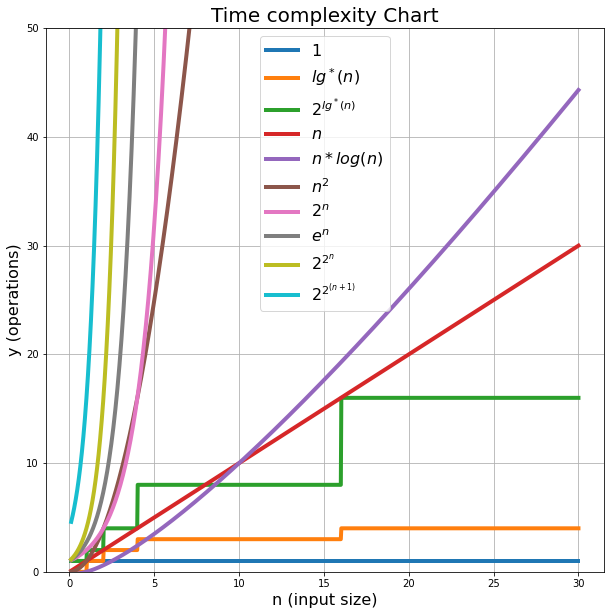

In [8]:
ex2()

# EX3
## You are given two algorithms with the following recurrent function A and B:
####  A(N) = A(N/2) + 1
####  B(N) = 2B(N/2) + N
#### 3.1 Draw a recursion tree for recurrences. What are the heights of these recursion trees? Do you recognise these recurrences (which algorithm?)? What complexity class (Big O) are these algorithms?

Heights of both of these recursion trees is 3.
It's clear that height of both of these trees is $log_2(n)$ rounded down.

The recurrence relation for binary search is A(n) = A(n/2) + 1. Binary search check the midpoint of the sequence against target value and eliminate half of the sequence from further consideration. This procedure repeats, halving the size of the remaining  portion of these sequence each  time. Therefore A(N) = $\Theta(log(n))$.
This can also be shown using the master theorem: a = 1 (number of subproblems), b = 2 (size of each subproblem is n/2), $f(n) = 1$, then we have $\Theta(n^{log_2(1)}) = \Theta(1)$, which is the second case. Therefore, A(n) = $\Theta(n^{log_2(1)} * log(n)) = \Theta(log(n))$.

The recurrence relation for merge sort is B(n) = 2B(n/2) + n. The divide  step  just  computes  the  middle  of  the  subarray,  which  takes constant time. Mergesort recursively solves two subproblems,  each of size n/2, which con-tributes 2B(n/2) to the running time. Finally, merge procedure on an n-element subarray takes time $\Theta(n)$ time. Therefore B(n) = $\Theta(n * log(n))$.


<font color="gray">Based on: Introduction to Algorithms by (The MIT Press) Thomas H. Cormen, pages 36, 97 </font>


![title](https://i.imgur.com/EoInyoR.png)
![title](https://i.imgur.com/EZAl1Rd.png)

#### 3.2 Estimate the number of operations. Given the formulas, write a program to estimate the number of operations given above complexities. Plot a graph showing the relation between T(N) and N.

I wrote functions, that estimate the number of operations and plotted them along approximation of their order of growth, from exercise 3.1.
As can be seen from the plot, both functions do about the same number of operations as expected from their approximation functions.

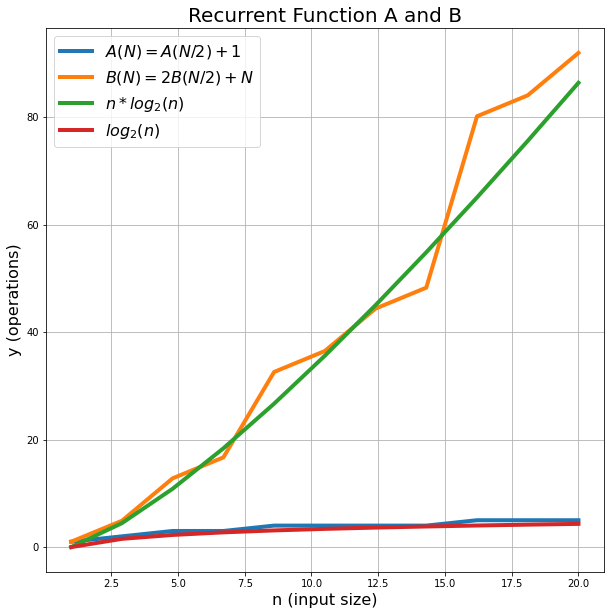

In [9]:
def A(n):
    return n if n <= 1 else A(n // 2) + 1

def B(n):
    return n if n <= 1 else B(n // 2) + B(n // 2) + n

ex3(A, B)

# EX4 - Implement linear search and binary search algorithm

As instructed I read the words into an array, created binary search and linear search algorithms for searching indexes of words in the list and demonstrated that they get same results for 3 existing and 2 non-existing words.

Conclusion: they work as expected and give the same result

In [10]:
with open("words.txt", encoding="utf-8") as file:
    words = [word.strip() for word in file.readlines()]

def linear_search(target):
    for index, word in enumerate(words):
        if word == target:
            return index
    else:
        return -1

def binary_search(target):
    L = 0
    R = len(words) - 1
    while L <= R:
        m = L + (R - L) // 2 # same as (L + R) // 2
        if target > words[m]:
            L = m + 1
        elif target < words[m]:
            R = m - 1
        else:
            return m
    return -1

for word in ["pizza", "Pepsi", "éclair", "regex", "Algorithmics"]:
    print(word, binary_search(word), linear_search(word))

pizza 70273 70273
Pepsi 11792 11792
éclair 99155 99155
regex -1 -1
Algorithmics -1 -1


# EX5

##### This is a continuation from the previous exercise. Let’s devise an experiment to measure how much faster is our binary search algorithm compared to the linear one.

I made plots comparing the runtime and number of comparisons of binary search and linear search.
First 50 results measure searching an existing word. Last 10 results measure searching a word not in the file.
The average is taken only from results of existing words.

As can be seen from the plots, it's clear that binary search significantly outperforms linear search.
Linear search takes on average few milliseconds while binary search takes few microseconds.
Linear search has to perform thousands of comparisons while binary search does at most 17 comparisons.

Worst case for linear search is searching non-existent words, because it has to compare all the elements (searching non-existent words formed a line of maximum comparisons on plot). Clearly linear search is dependent on the word index, the smaller the index the faster linear search finishes.
For binary search there was barely any difference searching non-existent words.



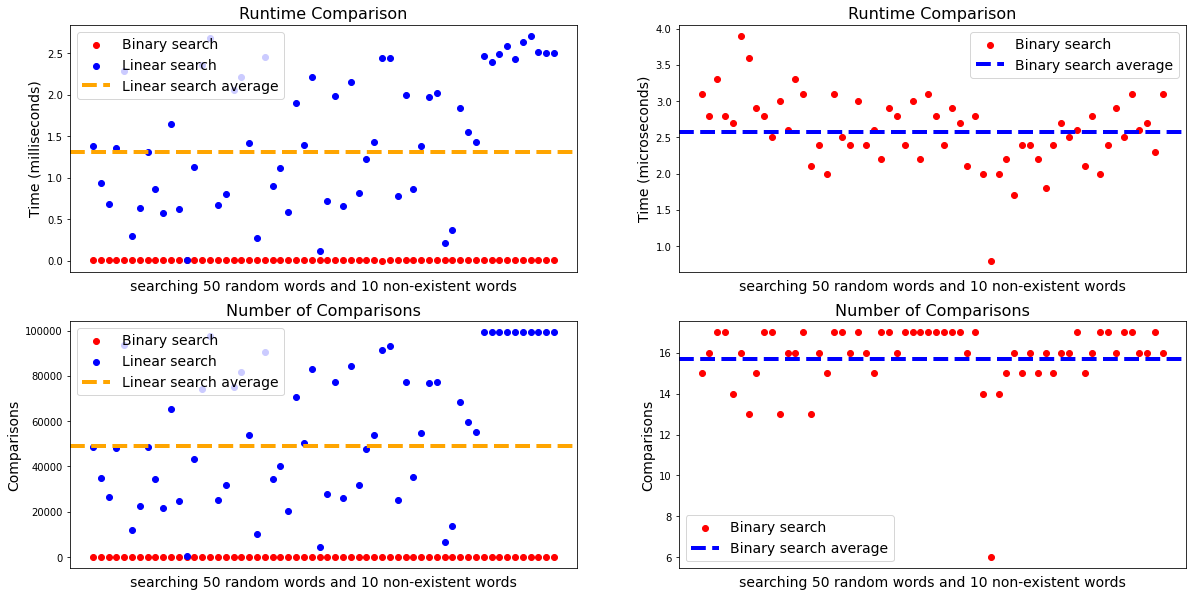

In [11]:
ex_5(linear_search, binary_search)

# EX6

#### Devise an experiment to attempt to detect and measure the effect of the memory caching on the program execution run time. E.g. manipulating values nearby or far from each other. Can you detect when the calculations get slower significantly when you start addressing areas outside of the cache?

I measured the runtime of a function that calculated factorial recursively.
When calculating factorial for the first time I cached the values 300 smallest recursive calls and accessed cached values when calculating factorial for second time, clearing cache after every run.

As can be seen from the plot, accessing cached values barely takes any time. When the cache gets full at x=300 the cached factorial runtime get slower significantly and starts increasing as fast as non cached version. It gets slower, because we are trying to access values outside of cache.

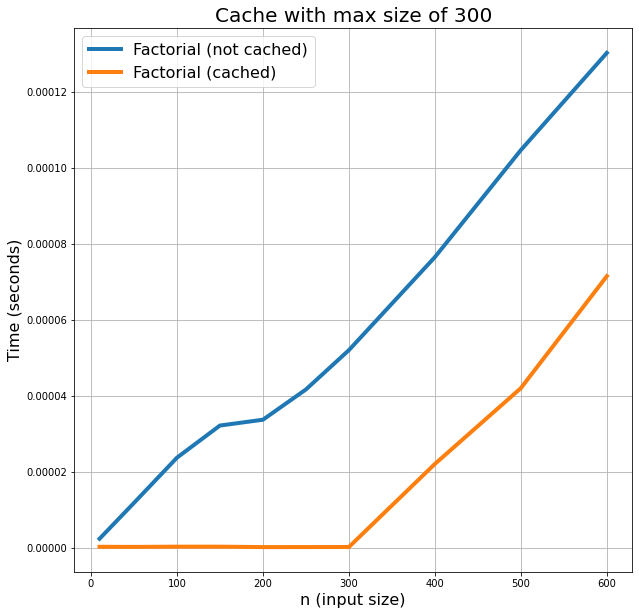

In [12]:
ex6()

# EX7

##### Your goal is to correctly guess the number I'm thinking of. The number is an integer between 0 and n-1, where n is a power of 2. How long would you take to guess the hidden number, in the worst case?

Using binary search worst case would be $log_2(n)$ rounded up, where n is the number of possible guesses.


##### Describe a better strategy for playing this game, and analyse it. Let's now say that your brain is too slow to make divisions and takes, in average, 3.7 seconds to give the result of a division. For any other operation, it's super fast and takes 11 milliseconds, in average. How fast can you be now at guessing the number, when comparing both strategies?

We can calculate the midpoint of splits beforehand.
For example with input size of 2^4, we calculate powers of 2 beforehand [1, 2, 4, 8]. Then we start reading values from the end, removing any used values. First midpoint is at index 8 - 1 = 7. For next midpoint the value is 4 indexes away, so we either subtract or add it to the index. Next middle point is 2 indexes away and next one 1 index away. At some point we should have reached the target word.

Binary search without divison takes on average twice the time to find the target.

If division takes 3.7 seconds and any other operation 11 milliseconds.
Then binary search would spend at most 3.7 seconds * $log_2(n)$ on just division.
Binary search without division would only spend at most 11 milliseconds * $log_2(n)$ to calculate midpoint and an additional $log_2(n)$  * (3 * 11 milliseconds) to calculate powers of 2 beforehand. [while loop comparisons] * [i+=1, midpoints.append(power), power = 2 ** i]. The remaining part of both functions is the same, so both spend equal amount of time there.
There's no doubt that alternative binary search without division would take considerably less time to finish than just doing a single division.


In [13]:
words_2 = words[:2**16] # The number is an integer between 0 and n-1, where n is a power of 2

def binary_search2(target):
    L = 0
    R = len(words_2) - 1
    while L <= R:
        m = L + (R - L) // 2
        if target > words_2[m]:
            L = m + 1
        elif target < words_2[m]:
            R = m - 1
        else:
            return m
    return -1

def binary_search_alternative(target):
    midpoints = [1]
    power = 1
    i = 0
    while power < len(words_2):
        i+=1
        midpoints.append(power)
        power = 2 ** i

    m = midpoints.pop() -1
    while midpoints:
        if target > words_2[m]:
            m = m  + midpoints.pop()
        elif target < words_2[m]:
            m = m  - midpoints.pop()
        else:
            return m
    return -1

for word in ["daffy", "gibed", "ASCII's", "regex", "Algorithmics"]:
    print(word, binary_search2(word), binary_search_alternative(word))

daffy 34215 34215
gibed 47149 47149
ASCII's 12 12
regex -1 -1
Algorithmics -1 -1


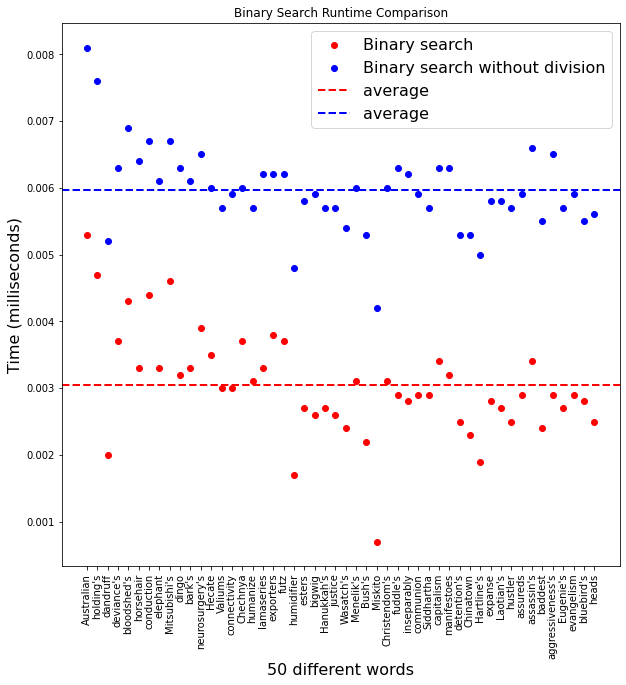

In [17]:
ex7(binary_search2, binary_search_alternative)